In [53]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [54]:
df_sales = pd.read_excel('IVY DATA Normalized.xlsx',encoding='latin1')
df_sales.head()

,S.No,Order No.,date,Company,Cuid,Customer,Employee,sales,Discount,Total,Order Type,View,Month
0,8179,115047,2019-01-01 10:06:35,Treet,6014,Hafeez Gen Store,Asad Bokhari,406.0008,0,406.0008,DELIVERED,View,Jan
1,6688,115653,2019-01-01 10:25:15,Treet,5680,Javaid Pan Shop,Mohd. Umer,826.9992,0,826.9992,DELIVERED,View,Jan
2,1412,115529,2019-01-01 10:25:54,Treet,4628,M.A Karyana @ Nishat Colony,Asif Mannan,52.7082,0 0,52.7082,DELIVERED,View,Jan
3,1413,115530,2019-01-01 10:26:23,Treet,4629,Subhan Store @ Nishat Colony,Asif Mannan,101.5002,0 0,101.5002,DELIVERED,View,Jan
4,1414,115531,2019-01-01 10:26:41,Treet,4626,Hafiz cold corner,Asif Mannan,203.0004,0 0,203.0004,DELIVERED,View,Jan


In [55]:
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales.set_index('date', inplace=True)


In [56]:
df_sales.drop(['Cuid','S.No','Order No.','Total'],axis=1,inplace=True)

In [57]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114594 entries, 2019-01-01 10:06:35 to 2019-12-31 20:01:57
Data columns (total 8 columns):
Company       114594 non-null object
Customer      114594 non-null object
Employee      114594 non-null object
sales         114594 non-null float64
Discount      114594 non-null object
Order Type    114594 non-null object
View          114594 non-null object
Month         114594 non-null object
dtypes: float64(1), object(7)
memory usage: 7.9+ MB


In [58]:
#represent month in date field as its first day



#groupby date and sum the sales
wdf=df_sales.resample('W').sum()
#df_sales = df_sales.groupby('date').sales.sum().reset_index()

In [59]:
wdf

,sales
date,
2019-01-06,2.294665e+06
2019-01-13,5.355544e+06
2019-01-20,8.818287e+06
2019-01-27,6.468251e+06
2019-02-03,1.015915e+07
2019-02-10,6.448049e+06
2019-02-17,1.275427e+07
2019-02-24,1.346009e+07
2019-03-03,4.007752e+06


In [60]:
wdf.head()

,sales
date,
2019-01-06,2.294665e+06
2019-01-13,5.355544e+06
2019-01-20,8.818287e+06
2019-01-27,6.468251e+06
2019-02-03,1.015915e+07


In [61]:
#df_sales = df_sales.set_index('date')
#df_sales.index

In [62]:
y = wdf['sales'].resample('W').sum()


In [63]:
y['2019':]

date
2019-01-06    2.294665e+06
2019-01-13    5.355544e+06
2019-01-20    8.818287e+06
2019-01-27    6.468251e+06
2019-02-03    1.015915e+07
2019-02-10    6.448049e+06
2019-02-17    1.275427e+07
2019-02-24    1.346009e+07
2019-03-03    4.007752e+06
2019-03-10    1.175149e+07
2019-03-17    1.125646e+07
2019-03-24    1.106372e+07
2019-03-31    1.272451e+07
2019-04-07    1.037297e+07
2019-04-14    1.009813e+07
2019-04-21    1.617640e+07
2019-04-28    1.253540e+07
2019-05-05    1.205097e+07
2019-05-12    7.614003e+06
2019-05-19    1.152308e+07
2019-05-26    1.386483e+07
2019-06-02    1.786425e+07
2019-06-09    3.364055e+05
2019-06-16    2.197426e+07
2019-06-23    1.666454e+07
2019-06-30    1.814492e+07
2019-07-07    7.752973e+06
2019-07-14    1.542773e+07
2019-07-21    1.226803e+07
2019-07-28    1.247520e+07
2019-08-04    1.184896e+07
2019-08-11    1.365906e+06
2019-08-18    6.853174e+05
2019-08-25    1.959197e+07
2019-09-01    1.564936e+07
2019-09-08    1.424579e+07
2019-09-15    8.138485e

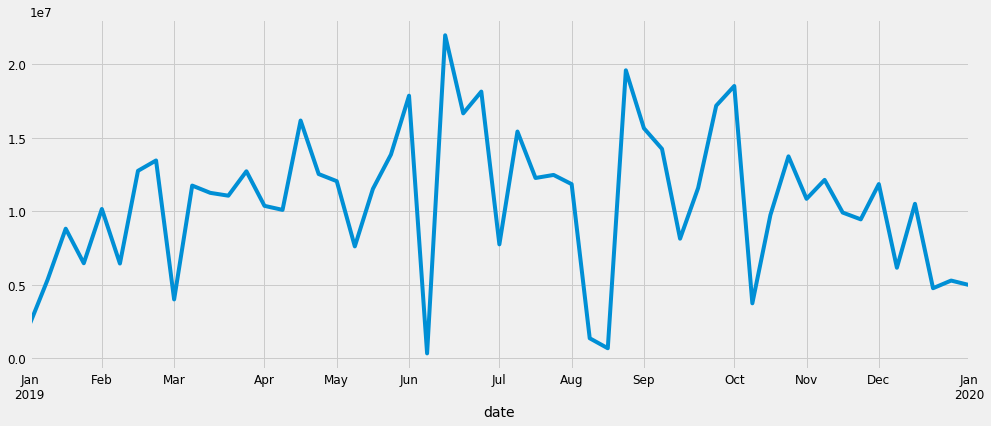

In [64]:
y.plot(figsize=(15, 6))
plt.show()

In [65]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 18, 8
# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()
# plt.show()

In [83]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 15) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 15)
SARIMAX: (0, 0, 1) x (0, 1, 0, 15)
SARIMAX: (0, 1, 0) x (0, 1, 1, 15)
SARIMAX: (0, 1, 0) x (1, 0, 0, 15)


In [84]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
   
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 15)12 - AIC:1843.5052784353386
ARIMA(0, 0, 0)x(0, 0, 1, 15)12 - AIC:1673350096.9011502
ARIMA(0, 0, 0)x(0, 1, 0, 15)12 - AIC:1281.6990659832175
ARIMA(0, 0, 0)x(1, 0, 0, 15)12 - AIC:1315.8039610350258
ARIMA(0, 0, 0)x(1, 0, 1, 15)12 - AIC:1411673880.8479297
ARIMA(0, 0, 0)x(1, 1, 0, 15)12 - AIC:787.2441030156511
ARIMA(0, 0, 1)x(0, 0, 0, 15)12 - AIC:1789.3316038899086
ARIMA(0, 0, 1)x(0, 0, 1, 15)12 - AIC:1644668176.2056007
ARIMA(0, 0, 1)x(0, 1, 0, 15)12 - AIC:1247.525909725806
ARIMA(0, 0, 1)x(1, 0, 0, 15)12 - AIC:1329.3170509995866
ARIMA(0, 0, 1)x(1, 0, 1, 15)12 - AIC:1382993180.1323533
ARIMA(0, 0, 1)x(1, 1, 0, 15)12 - AIC:791.8442054409012
ARIMA(0, 1, 0)x(0, 0, 0, 15)12 - AIC:1749.679689664173
ARIMA(0, 1, 0)x(0, 0, 1, 15)12 - AIC:280081292.03464824
ARIMA(0, 1, 0)x(0, 1, 0, 15)12 - AIC:1276.7499528084259
ARIMA(0, 1, 0)x(1, 0, 0, 15)12 - AIC:1277.2417178556298
ARIMA(0, 1, 0)x(1, 0, 1, 15)12 - AIC:243135816.7642746
ARIMA(0, 1, 0)x(1, 1, 0, 15)12 - AIC:767.951381179648

In [85]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 0, 0, 15),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L15      -0.2172      0.162     -1.341      0.180      -0.535       0.100
sigma2      5.158e+13   1.13e-15   4.56e+28      0.000    5.16e+13    5.16e+13


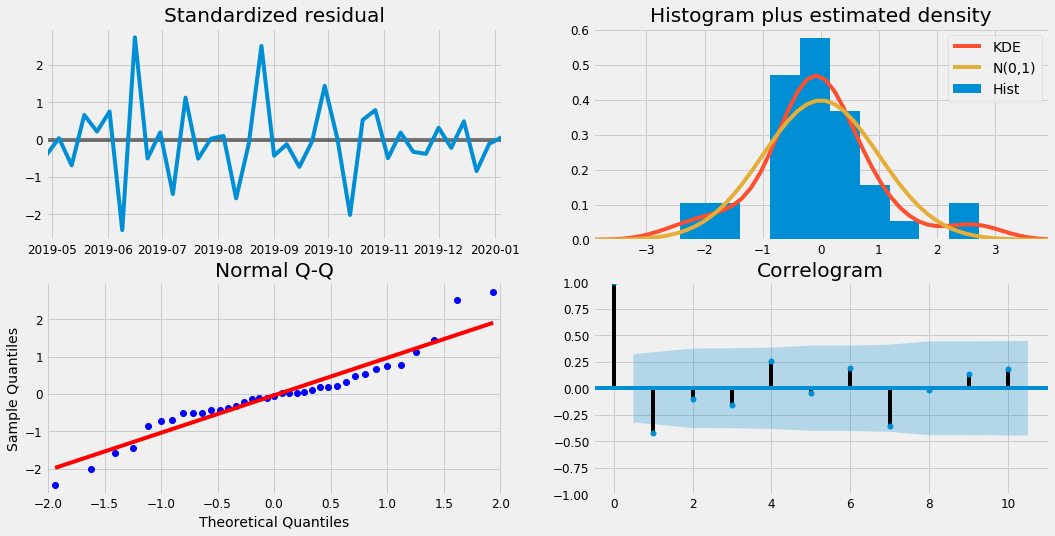

In [86]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()
#KDE (In statistics, kernel density estimation is a non-parametric way 
#to estimate the probability density function of a random variable. 
#Kernel density estimation is a fundamental data smoothing problem 
#where inferences about the population are made, based on a finite data sample)

Residual:Relationship between a given independent variable and the response variable given that other independent variables are also in the model.

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight. 

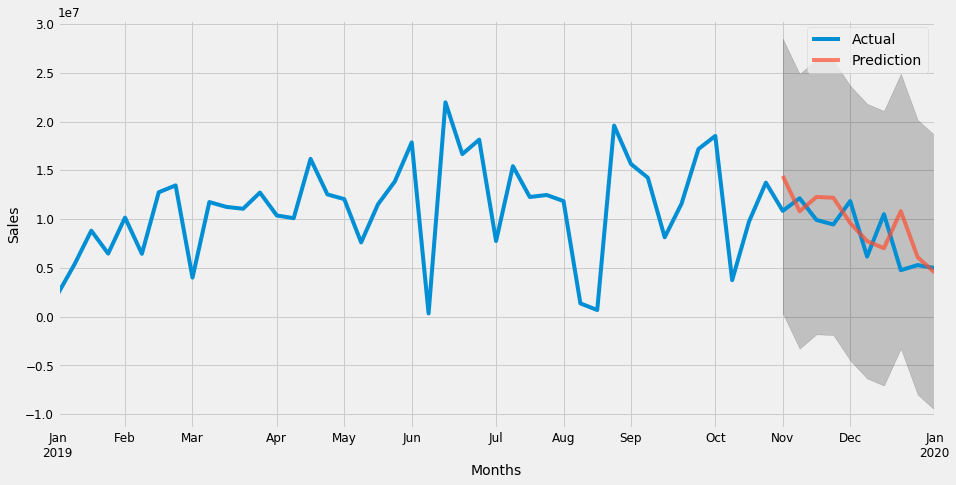

In [87]:
pred = results.get_prediction(start=pd.to_datetime('2019-11-03'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='Actual')
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Months')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [88]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-11-03':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 8485038282982.41


y_forecasted = pred.predicted_mean
y_truth = y['2019-11-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [89]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 2912908.9


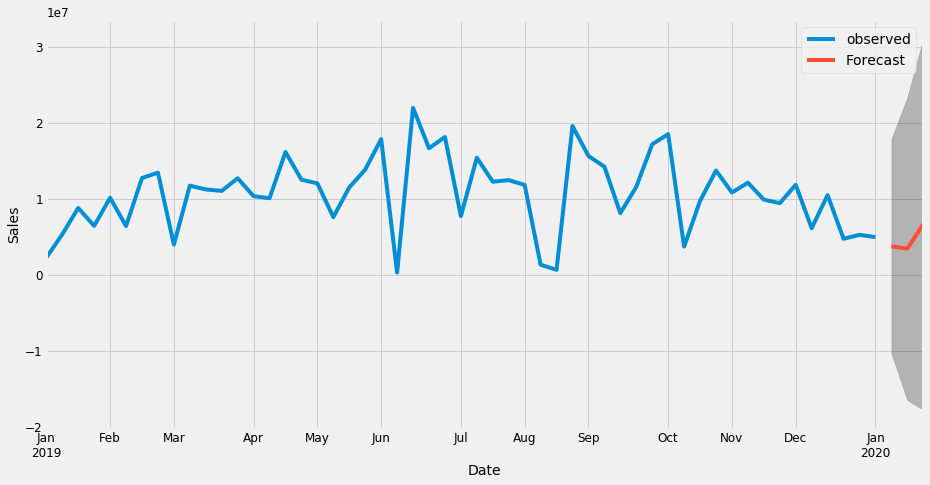

In [90]:
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [40]:
# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# import sklearn
# from sklearn.metrics import confusion_matrix 
# from sklearn.metrics import accuracy_score 
# from sklearn.metrics import classification_report 

In [48]:
# results = [1 if y>=0.5 else 0 for y in pred] #Threshold
# print(classification_report(y_train ,pred ))
# print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
# print()
# print('Accuracy: ', accuracy_score(y_train,pred))
# print()